# SANTANDER CUSTOMER TRANSACTION PREDICTION

## Entendendo o Problema

At Santander our mission is to help people and businesses prosper. We are always looking for ways to help our customers understand their financial health and identify which products and services might help them achieve their monetary goals.

Our data science team is continually challenging our machine learning algorithms, working with the global data science community to make sure we can more accurately identify new ways to solve our most common challenge, binary classification problems such as: is a customer satisfied? Will a customer buy this product? Can a customer pay this loan?

**In this challenge, we invite Kagglers to help us identify which customers will make a specific transaction in the future, irrespective of the amount of money transacted. The data provided for this competition has the same structure as the real data we have available to solve this problem.**

Ref.: https://www.kaggle.com/c/santander-customer-transaction-prediction

In [1]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import statsmodels.api as sm

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## Pegando os Dados

In [2]:
# Configurando opção para mostrar todas as colunas do dataset
pd.set_option("display.max_columns", None)

In [3]:
# Lendo e verificando os dados de treino e de teste
df_train = pd.read_csv(r'/kaggle/input/santander-customer-transaction-prediction/train.csv')
df_test = pd.read_csv(r'/kaggle/input/santander-customer-transaction-prediction/test.csv')

## Pre-processamento dos Dados

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 201 entries, ID_code to var_199
dtypes: float64(200), object(1)
memory usage: 306.7+ MB


In [6]:
df_train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,2.9252,3.1821,14.0137,0.5745,8.7989,14.5691,5.7487,-7.2393,4.2840,30.7133,10.5350,16.2191,2.5791,2.4716,14.3831,13.4325,-5.1488,-0.4073,4.9306,5.9965,-0.3085,12.9041,-3.8766,16.8911,11.1920,10.5785,0.6764,7.8871,4.6667,3.8743,-5.2387,7.3746,11.5767,12.0446,11.6418,-7.0170,5.9226,-14.2136,16.0283,5.3253,12.9194,29.0460,-0.6940,5.1736,-0.7474,14.8322,11.2668,5.3822,2.0183,10.1166,16.1828,4.9590,2.0771,-0.2154,8.6748,9.5319,5.8056,22.4321,5.0109,-4.7010,21.6374,0.5663,5.1999,8.8600,43.1127,18.3816,-2.3440,23.4104,6.5199,12.1983,13.6468,13.8372,1.3675,2.9423,-4.5213,21.4669,9.3225,16.4597,7.9984,-1.7069,-21.4494,6.7806,11.0924,9.9913,14.8421,0.1812,8.9642,16.2572,2.1743,-3.4132,9.4763,13.3102,26.5376,1.4403,14.7100,6.0454,9.5426,17.1554,14.1104,24.3627,2.0323,6.7602,3.9141,-0.4851,2.5240,1.5093,2.5516,15.5752,-13.4221,7.2739,16.0094,9.7268,0.8897,0.7754,4.2218,12.0039,13.8571,-0.7338,-1.9245,15.4462,12.8287,0.3587,9.6508,6.5674,5.1726,3.1345,29.4547,31.4045,2.8279,15.6599,8.3307,-5.6011,19.0614,11.2663,8.6989,8.3694,11.5659,-16.4727,4.0288,17.9244,18.5177,10.7800,9.0056,16.6964,10.4838,1.6573,12.1749,-13.1324,17.6054,11.5423,15.4576,5.3133,3.6159,5.0384,6.6760,12.6644,2.7004,-0.6975,9.5981,5.4879,-4.7645,-8.4254,20.8773,3.1531,18.5618,7.7423,-10.1245,13.7241,-3.5189,1.7202,-8.4051,9.0164,3.0657,14.3691,25.8398,5.8764,11.8411,-19.7159,17.5743,0.5857,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,-0.4032,8.0585,14.0239,8.4135,5.4345,13.7003,13.8275,-15.5849,7.8000,28.5708,3.4287,2.7407,8.5524,3.3716,6.9779,13.8910,-11.7684,-2.5586,5.0464,0.5481,-9.2987,7.8755,1.2859,19.3710,11.3702,0.7399,2.7995,5.8434,10.8160,3.6783,-11.1147,1.8730,9.8775,11.7842,1.2444,-47.3797,7.3718,0.1948,34.4014,25.7037,11.8343,13.2256,-4.1083,6.6885,-8.0946,18.5995,19.3219,7.0118,1.9210,8.8682,8.0109,-7.2417,1.7944,-1.3147,8.1042,1.5365,5.4007,7.9344,5.0220,2.2302,40.5632,0.5134,3.1701,20.1068,7.7841,7.0529,3.2709,23.4822,5.5075,13.7814,2.5462,18.1782,0.3683,-4.8210,-5.4850,13.7867,-13.5901,11.0993,7.9022,12.2301,0.4768,6.8852,8.0905,10.9631,11.7569,-1.2722,24.7876,26.6881,1.8944,0.6939,-13.6950,8.4068,35.4734,1.7093,15.1866,2.6227,7.3412,32.0888,13.9550,13.0858,6.6203,7.1051,5.3523,8.5426,3.6159,4.1569,3.0454,7.8522,-11.5100,7.5109,31.5899,9.5018,8.2736,10.1633,0.1225,12.5942,14.5697

In [7]:
df_test.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,8.8100,-2.0248,-4.3554,13.9696,0.3458,7.5408,14.5001,7.7028,-19.0919,15.5806,16.1763,3.7088,18.8064,1.5899,3.0654,6.4509,14.1192,-9.4902,-2.1917,5.7107,3.7864,-1.7981,9.2645,2.0657,12.7753,11.3334,8.1462,-0.0610,3.5331,9.7804,8.7625,-15.6305,18.8766,11.2864,11.8362,13.3680,-31.9891,12.1776,8.7714,17.2011,16.8508,13.0534,14.4069,-4.8525,7.3213,-0.5259,16.6365,19.3036,6.4129,-5.3948,9.3269,11.9314,-3.5750,-0.7706,0.8705,6.9282,2.8914,5.9744,17.4851,5.0125,-1.4230,33.3401,0.8018,-4.7906,30.2708,26.8339,21.7205,7.3075,14.0810,3.1192,17.4265,9.4883,16.9060,14.5117,10.0276,-0.9706,20.4588,4.7945,20.4160,13.1633,7.9307,-7.6509,7.0834,15.2324,10.1416,5.9156,-0.5775,5.7600,30.3238,2.1251,1.8585,-9.2198,17.3089,30.9548,1.4918,12.8721,3.4902,8.2856,11.9794,14.0176,15.0763,3.7662,6.0426,4.4243,14.1799,2.0921,1.5493,3.2206,0.0172,-6.6602,8.4785,42.0248,11.4164,0.4564,9.4006,0.9685,12.4929,14.1240,4.0388,-4.4442,16.6684,12.5380,0.9205,10.5998,7.5147,-4.1748,-0.4824,10.5267,17.7547,-6.5226,-2.5502,-5.1547,-2.1246,19.8319,13.0752,9.2275,3.0213,11.6793,-11.6827,4.1017,5.2954,18.7741,9.8892,7.5219,14.9745,18.9880,1.0842,11.9125,-4.5103,16.1361,11.0067,5.9232,5.4113,3.8302,5.7380,-8.6105,22.9530,2.5531,-0.2836,4.3416,5.1855,4.2603,1.6779,29.0849,8.4685,18.1317,12.2818,-0.6912,10.2226,-5.5579,2.2926,-4.5358,10.3903,-15.4937,3.9697,31.3521,-1.1651,9.2874,-23.5705,13.2643,1.6591,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,5.9739,-1.3809,-0.3310,14.1129,2.5667,5.4988,14.1853,7.0196,4.6564,29.1609,0.0910,12.1469,3.1389,5.2578,2.4228,16.2064,13.5023,-5.2341,-3.6648,5.7080,2.9965,-10.4720,11.4938,-0.9660,15.3445,10.6361,0.8966,6.7428,2.3421,12.8678,-1.5536,10.0309,3.1337,10.5742,11.7664,2.1782,-41.1924,13.5322,-17.3834,6.3806,12.5589,11.6887,25.3930,1.5776,6.8481,8.7348,16.4239,21.7056,6.9345,1.6678,9.5249,5.3383,-18.7083,1.3382,-1.7401,5.8398,3.1051,4.4307,16.0005,5.0306,-7.3365,12.2806,0.6992,-0.7772,21.5123,6.7803,18.1896,6.9388,22.1336,6.3755,13.1525,1.9772,14.0406,6.6904,9.9732,-11.5679,20.4525,9.4951,9.6343,8.1252,2.6059,-17.4201,7.1848,15.3484,10.6522,5.9897,0.3392,10.3516,29.8204,1.9998,-1.4166,-1.7257,15.4712,35.6020,1.6570,13.0783,2.7752,6.4986,4.6835,13.7963,17.7261,1.7375,5.5689,3.6609,8.9725,4.1159,1.0693,2.0234,8.2760,-6.8610,0.2780,17.0488,11.6704,3.1215,8.5093,5.6367,12.0099,14.2372,-

In [8]:
df_train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,2000

In [9]:
df_test.describe()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.00000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.00000

### Tratando os nulos

In [10]:
df_train.isnull().values.any()

False

In [11]:
df_test.isnull().values.any()

False

**Conclusão:** não existem valores nulos nos datasets.

### Procurando por observações duplicadas

In [12]:
df_train.duplicated().value_counts()

False    200000
dtype: int64

In [13]:
df_test.duplicated().value_counts()

False    200000
dtype: int64

**Conclusão:** não existem valores duplicados nos datasets.

### Verificando as distribuições das variáveis

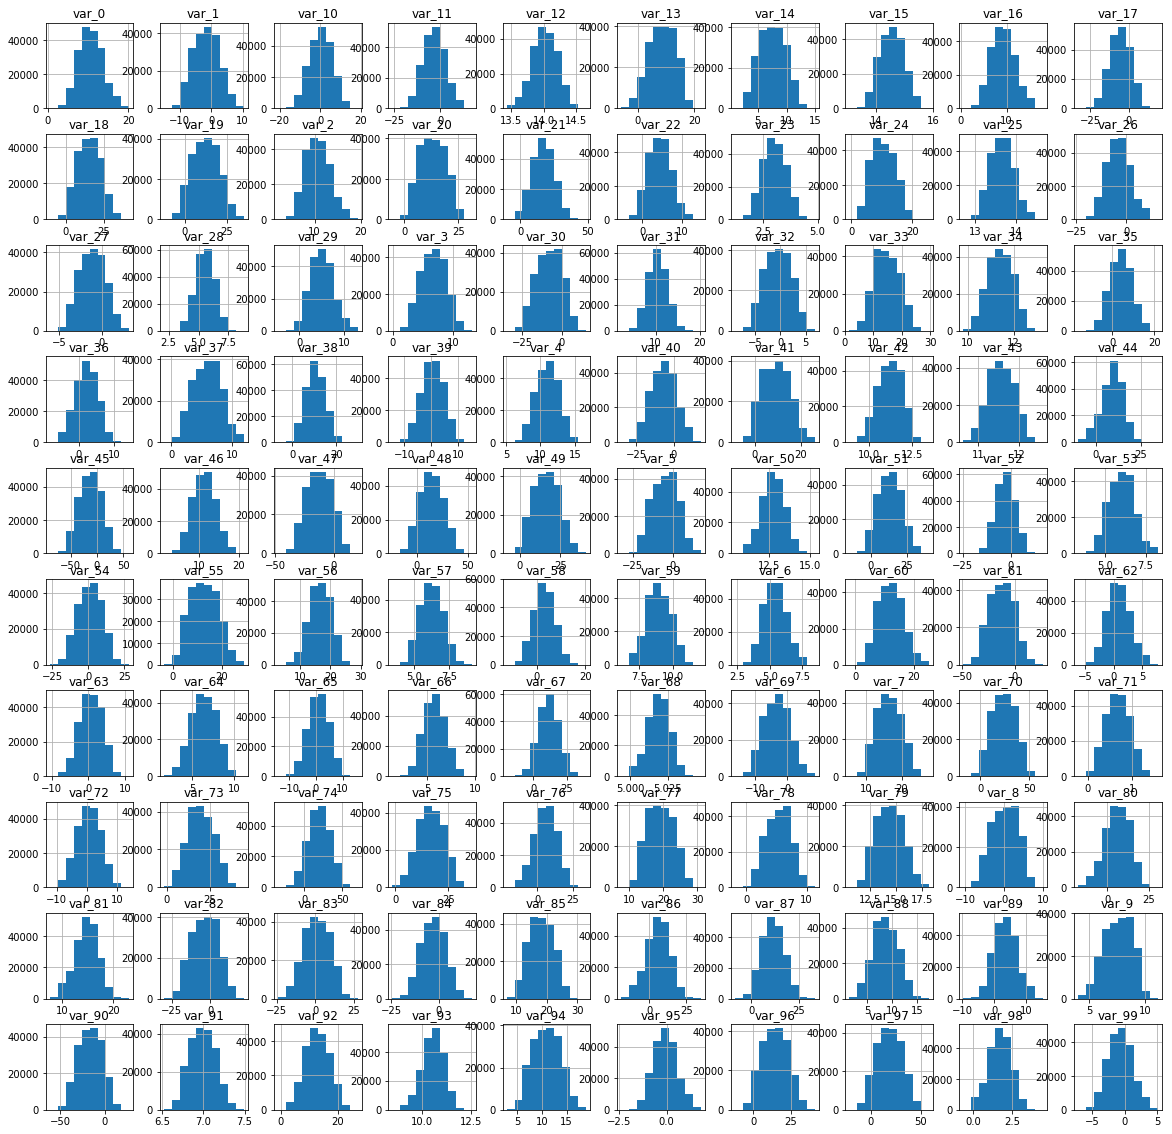

In [14]:
df_train.iloc[:,2:102].hist(figsize = (20,20));

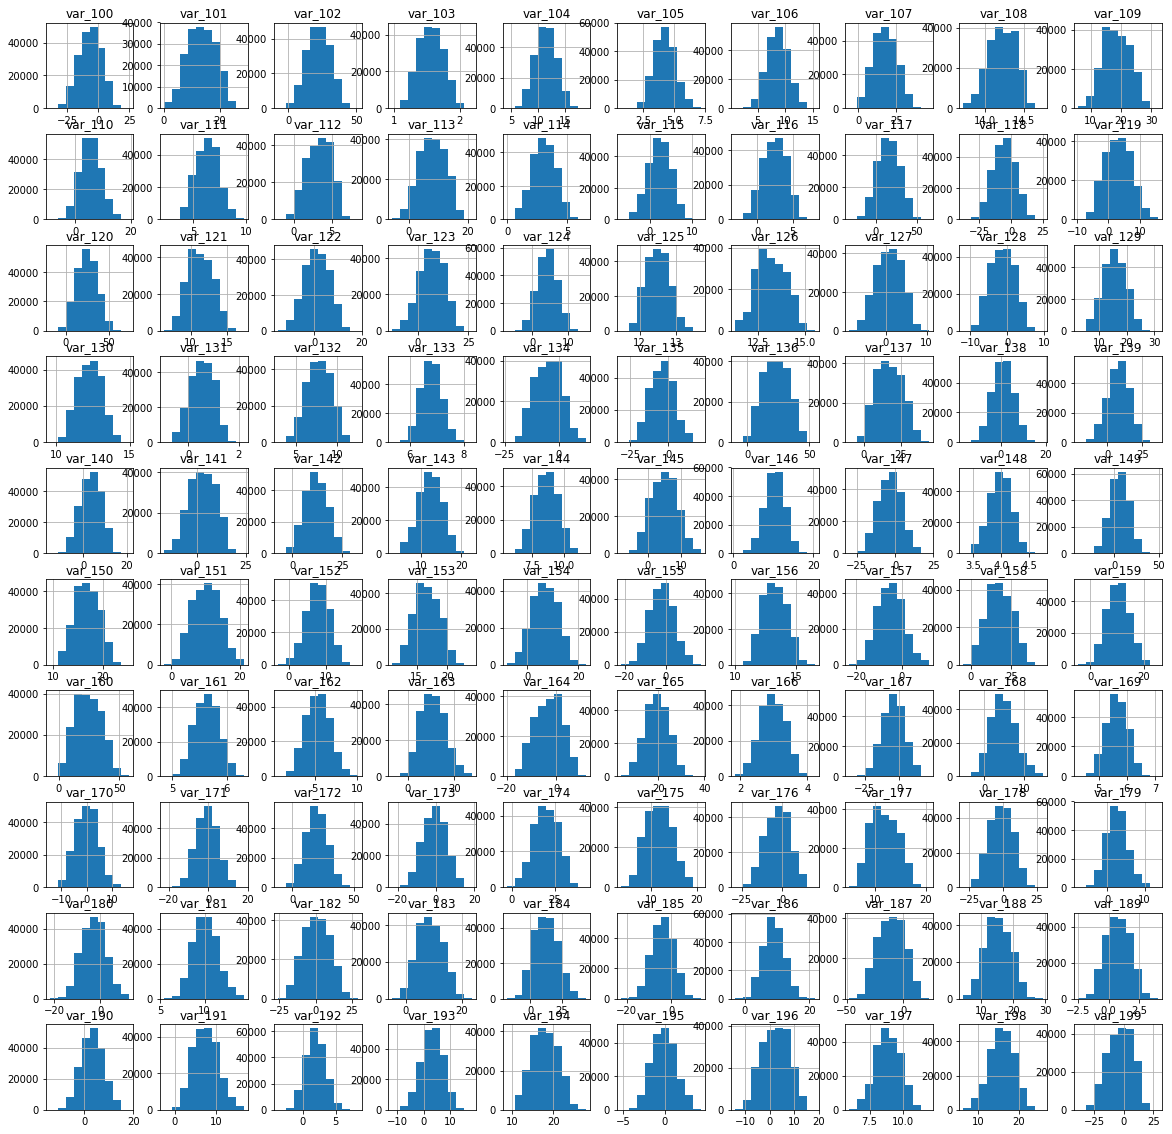

In [15]:
df_train.iloc[:,102:202].hist(figsize = (20,20));

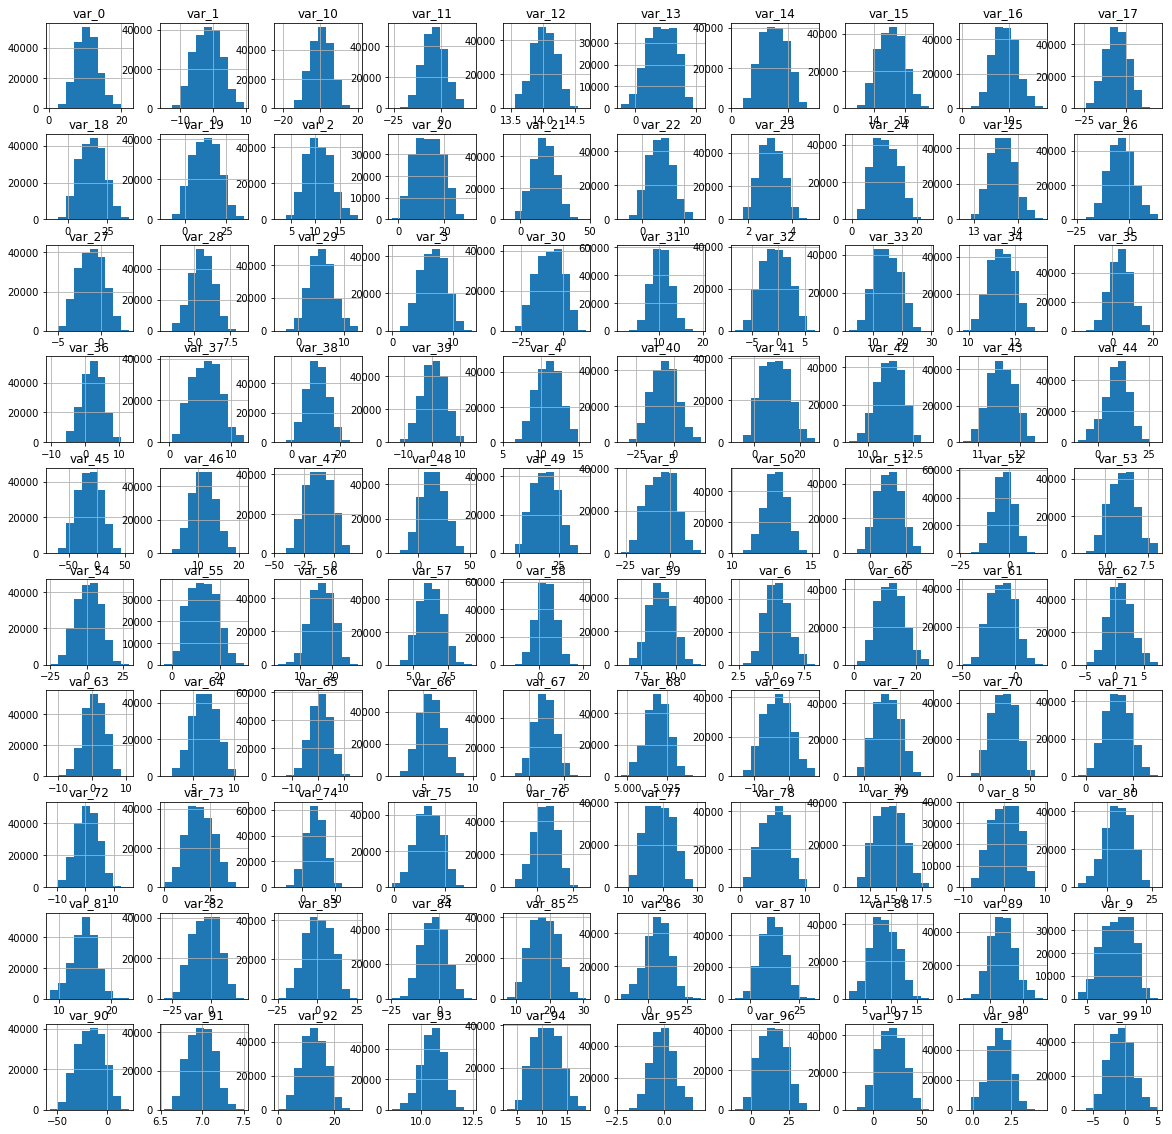

In [16]:
df_test.iloc[:,1:101].hist(figsize = (20,20));

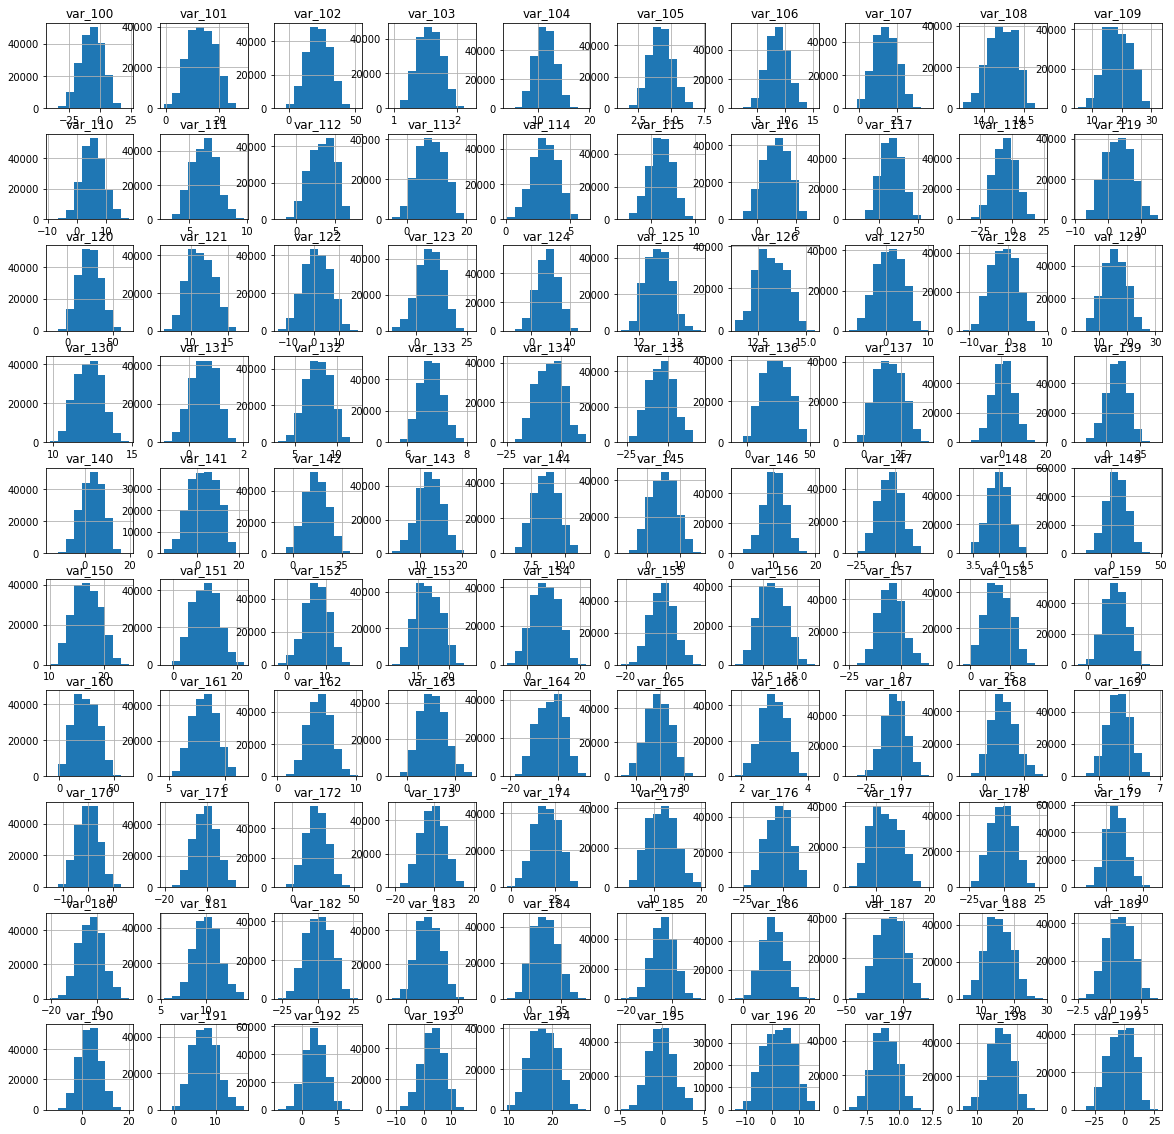

In [17]:
df_test.iloc[:,101:201].hist(figsize = (20,20));

In [18]:
from scipy import stats

skewed_feats = df_train.iloc[:,2:].apply(lambda x: stats.skew(x.dropna())).sort_values(ascending=False)
print("\nAssimetria: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head()


Assimetria: 



,Skew
var_168,0.267412
var_2,0.260312
var_179,0.242889
var_0,0.235637
var_163,0.234778


In [19]:
from scipy import stats

skewed_feats = df_test.iloc[:,1:].apply(lambda x: stats.skew(x.dropna())).sort_values(ascending=False)
print("\nAssimetria: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head()


Assimetria: 



,Skew
var_168,0.268679
var_2,0.262867
var_179,0.247597
var_163,0.243176
var_0,0.225448


**Conclusão:** as variáveis explicativas apresentam distribuições normais.

## Exploratory Data Analysis (EDA)

### Verificando as correlações e plotando um HeatMap

In [20]:
# Verificando as correlações no Dataset de Treino
df_train_corr = df_train.corr()
df_train_corr

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
target,1.000000,0.052390,0.050343,0.055870,0.011055,0.010915,0.030979,0.066731,-0.003025,0.019584,-0.042805,-0.002213,0.022993,-0.069489,-0.055156,-0.006332,0.017283,0.008117,0.000864,0.043479,0.011291,-0.018329,-0.058483,0.060558,-0.025473,0.028477,0.013328,0.062422,-0.000582,-0.023942,0.004682,0.000638,-0.025619,0.030513,-0.044334,-0.052692,0.036567,-0.038397,0.007685,0.000970,-0.004090,0.049530,-0.001298,-0.008365,-0.028557,-0.049039,-0.020065,0.005690,0.008983,0.032334,0.030612,-0.013900,0.025992,0.027754,0.063399,-0.015796,0.017176,-0.035000,-0.015468,-0.024277,-0.010448,0.006265,0.007407,0.013888,-0.014670,-0.013805,0.011214,0.023114,0.044673,-0.011957,0.008283,0.026748,0.033607,-0.013005,-0.006460,0.019926,-0.038081,-0.061917,-0.017459,0.048245,0.007591,-0.057609,-0.080917,0.022574,-0.020528,0.012363,-0.024513,-0.039126,-0.035860,-0.020677,0.039369,0.029395,0.040127,-0.046295,-0.035070,0.046296,0.038531,0.003037,0.015224,-0.004074,0.058367,0.002215,-0.009138,-0.018329,-0.001395,-0.026605,0.025604,0.032947,-0.039997,-0.044791,-0.049926,0.064275,0.026686,0.023694,-0.013681,-0.026266,-0.050174,-0.023448,0.002591,0.040358,0.030975,-0.010895,-0.039788,-0.042461,-0.040291,0.004218,0.028223,0.001393,-0.039125,0.026909,-0.005880,0.029917,-0.032380,-0.024510,0.054548,0.017213,0.027944,-0.003554,0.027190,0.018328,-0.074080,0.015301,-0.029701,-0.018901,-0.011202,0.021208,0.030917,-0.063644,0.040280,-0.055011,-0.047319,-0.025821,0.027524,-0.010773,-0.007103,-0.046106,0.037240,-0.020997,0.032642,-0.003817,0.015278,-0.005135,0.004168,0.032647,0.031811,0.040997,-0.055734,-0.057773,0.030797,0.014115,-0.048382,0.047973,0.014873,-0.037976,0.042022,-0.061669,0.021692,0.007469,-0.036863,-0.019681,0.050002,0.031190,0.013714,-0.007198,-0.005467,0.048315,0.000053,-0.030421,0.014873,-0.034015,0.009212,0.055973,0.047114,-0.042858,-0.017709,-0.022838,0.028285,0.023608,-0.035303,-0.053000,0.025434
var_0,0.052390,1.000000,-0.000544,0.006573,0.003801,0.001326,0.003046,0.006983,0.002429,0.004962,-0.002613,0.000355,0.003468,-0.001996,-0.002717,-0.004584,-0.000043,0.001112,-0.001664,0.004292,0.001505,-0.000932,0.000781,0.002322,-0.000987,0.003658,0.001158,0.006117,0.000985,0.001081,-0.000426,0.003187,-0.002097,0.000274,-0.003343,-0.003933,0.001469,-0.002556,-0.000253,-0.000470,-0.001409,0.006798,0.001152,-0.000440,0.002685,-0.003003,-0.001539,0.000129,0.004062,0.003767,0.000524,-0.004678,0.001217,0.003037,0.001259,-0.000783,-0.001055,-0.000318,-0.003824,-0.002385,-0.001962,0.002243,

In [21]:
# Verificando as correlações no Dataset de Teste
df_test_corr = df_test.corr()
df_test_corr

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
var_0,1.000000,0.004234,0.002625,0.000847,-0.004252,0.002274,0.001930,-0.004654,-0.003669,0.001427,0.003139,0.003796,-0.005542,0.001260,0.002961,-0.001402,0.002067,-0.003611,0.001082,-0.000604,-0.000742,-0.004929,0.004280,-0.004147,0.002496,-0.003088,-0.000046,-0.003921,-0.001889,0.001379,-0.000201,-0.001142,0.001426,-0.007284,-0.001129,0.003555,0.000333,-0.001548,-0.000250,0.002548,0.002378,0.001686,0.000999,-0.001484,0.000445,0.000294,0.004359,-0.004238,-0.003307,-0.003495,-0.003195,-0.001208,-0.003152,-0.001474,0.000609,0.002831,-0.001798,-0.006291,-0.000010,0.000062,0.001460,0.000830,-0.002889,0.000778,0.000263,0.000544,-0.002187,0.000605,0.000384,-0.001497,-0.000389,-0.001207,-0.002954,0.000222,-0.001454,-0.003248,0.000801,-0.003839,0.001051,-0.004367,0.002727,-0.000480,0.001387,-0.001089,0.004277,0.002704,0.000080,0.001368,-0.002579,0.003386,0.000327,0.002107,0.002768,0.001755,0.003339,0.001616,0.003568,0.003352,-0.004308,-0.000019,-0.001554,0.002123,0.000153,0.000416,-0.000296,0.001843,0.005122,0.000410,-0.002826,-0.001376,0.000356,-0.002315,-0.000727,-0.001037,0.000561,-0.005828,0.000273,0.002459,0.001984,0.003254,-0.000051,-0.000093,0.002405,0.000657,-0.000935,0.003319,0.001403,-0.000777,0.000783,-0.001550,0.003496,-0.002987,-0.000680,-0.000904,-0.004299,-0.000137,0.000523,0.000050,-0.002786,0.000937,0.002126,0.000974,-0.003155,0.002041,-0.001028,0.000256,-0.002518,0.000550,-0.002850,0.003589,-0.005216,0.003999,0.002378,-0.000206,0.001711,0.000301,0.003086,0.003114,0.004361,-0.003044,0.001652,0.002868,-0.000363,0.002853,0.001237,-0.001749,0.001571,-0.000392,-0.003478,0.000430,0.005642,0.001450,0.003215,0.000539,-0.001045,0.000066,0.002634,-0.000965,-0.000124,0.000862,0.003332,0.003338,-0.001415,-0.003736,-0.002757,0.000085,0.000215,-0.000966,-0.000986,-0.001187,0.002662,0.001151,0.001102,0.002756,-0.003509,0.001446,-0.000754,-0.000382,-0.004068,0.001248
var_1,0.004234,1.000000,0.002912,-0.002148,0.000716,0.001393,0.003567,0.003024,0.000778,-0.002643,-0.001371,0.003643,-0.006257,-0.001165,0.001074,0.002605,-0.000679,-0.002565,0.001085,0.004557,0.000616,0.001687,0.005100,-0.001199,0.002289,0.002372,0.005159,-0.000409,-0.003089,-0.000947,-0.003254,-0.002996,-0.002287,-0.001554,-0.002339,0.000853,-0.001377,-0.002248,-0.000246,-0.002071,-0.003614,-0.002020,-0.003313,0.000069,-0.006623,-0.000472,0.000176,0.000129,-0.001030,0.002401,-0.002891,-0.000537,-0.001500,-0.000705,-0.000969,0.002725,-0.001775,-0.001491,-0.000194,0.001072,0.001210,0.002823,0.000287,-0.0009

**Conclusão:** As variáveis possuem fraca correlação entre si.

In [22]:
# Identificando as 10 variáveis que mais estão positivamente correlacionadas com o target
df_train_most_pos_corr = df_train_corr.nlargest(11, 'target')['target']
# Identificando as 10 variáveis que mais estão negativamente correlacionadas com o target
df_train_most_neg_corr = df_train_corr.nsmallest(10, 'target')['target']
# Concatenando as 20 variáveis
df_train_most_corr = pd.concat([df_train_most_pos_corr,df_train_most_neg_corr])
df_train_most_corr

target     1.000000
var_6      0.066731
var_110    0.064275
var_53     0.063399
var_26     0.062422
var_22     0.060558
var_99     0.058367
var_190    0.055973
var_2      0.055870
var_133    0.054548
var_0      0.052390
var_81    -0.080917
var_139   -0.074080
var_12    -0.069489
var_146   -0.063644
var_76    -0.061917
var_174   -0.061669
var_21    -0.058483
var_166   -0.057773
var_80    -0.057609
var_165   -0.055734
Name: target, dtype: float64

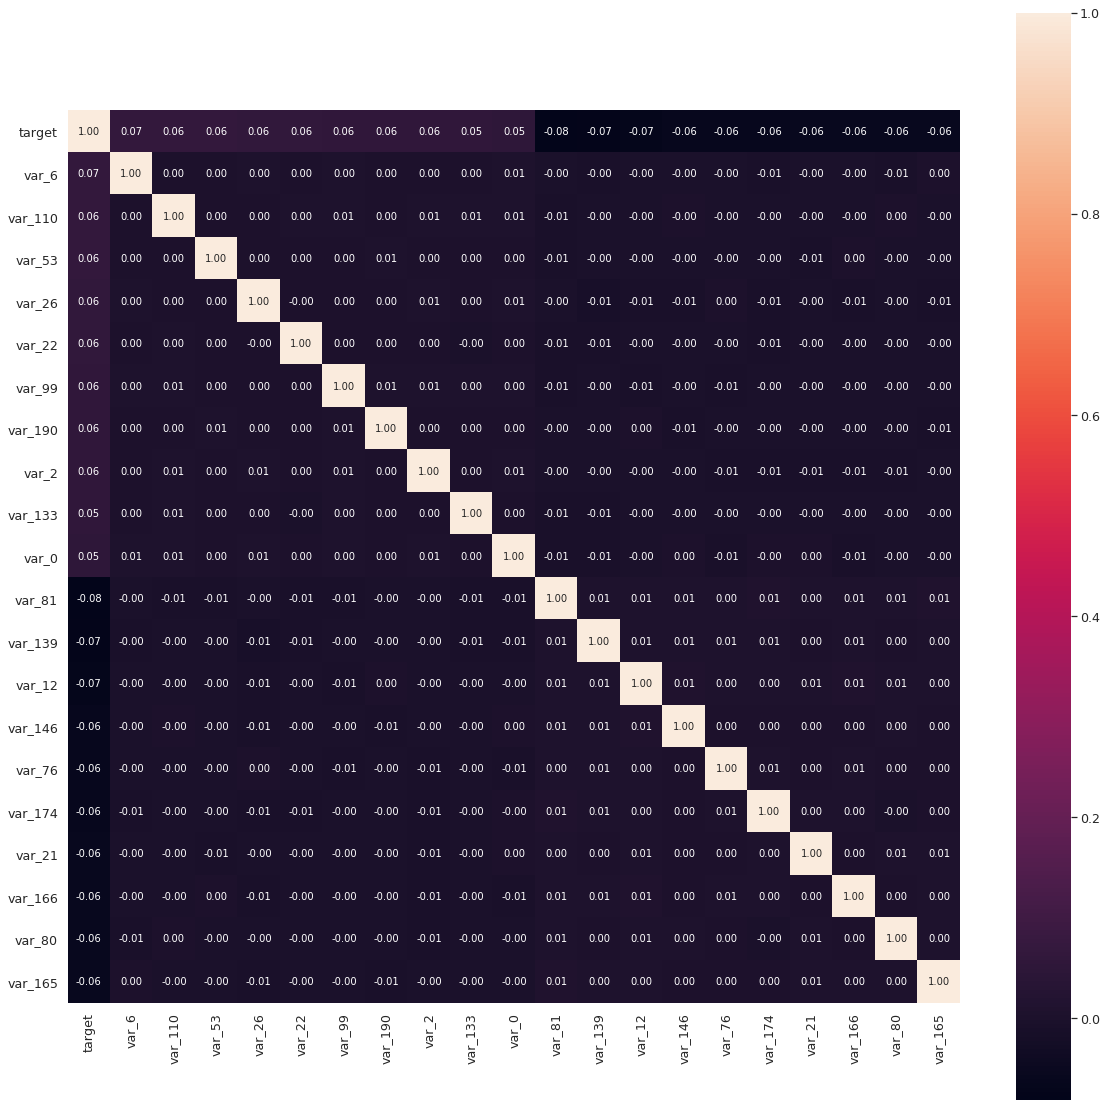

In [23]:
# Plotando um mapa de calor com as 20 variáveis mais correlacionadas (10+ positivamente e 10+ negativamente)
cols = df_train_most_corr.index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.15)
f, ax = plt.subplots(figsize=(20, 20))
hm = sns.heatmap(cm, 
                 cbar=True, 
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size': 10}, 
                 yticklabels=cols.values, 
                 xticklabels=cols.values)

### Plotando um Pair-Plot

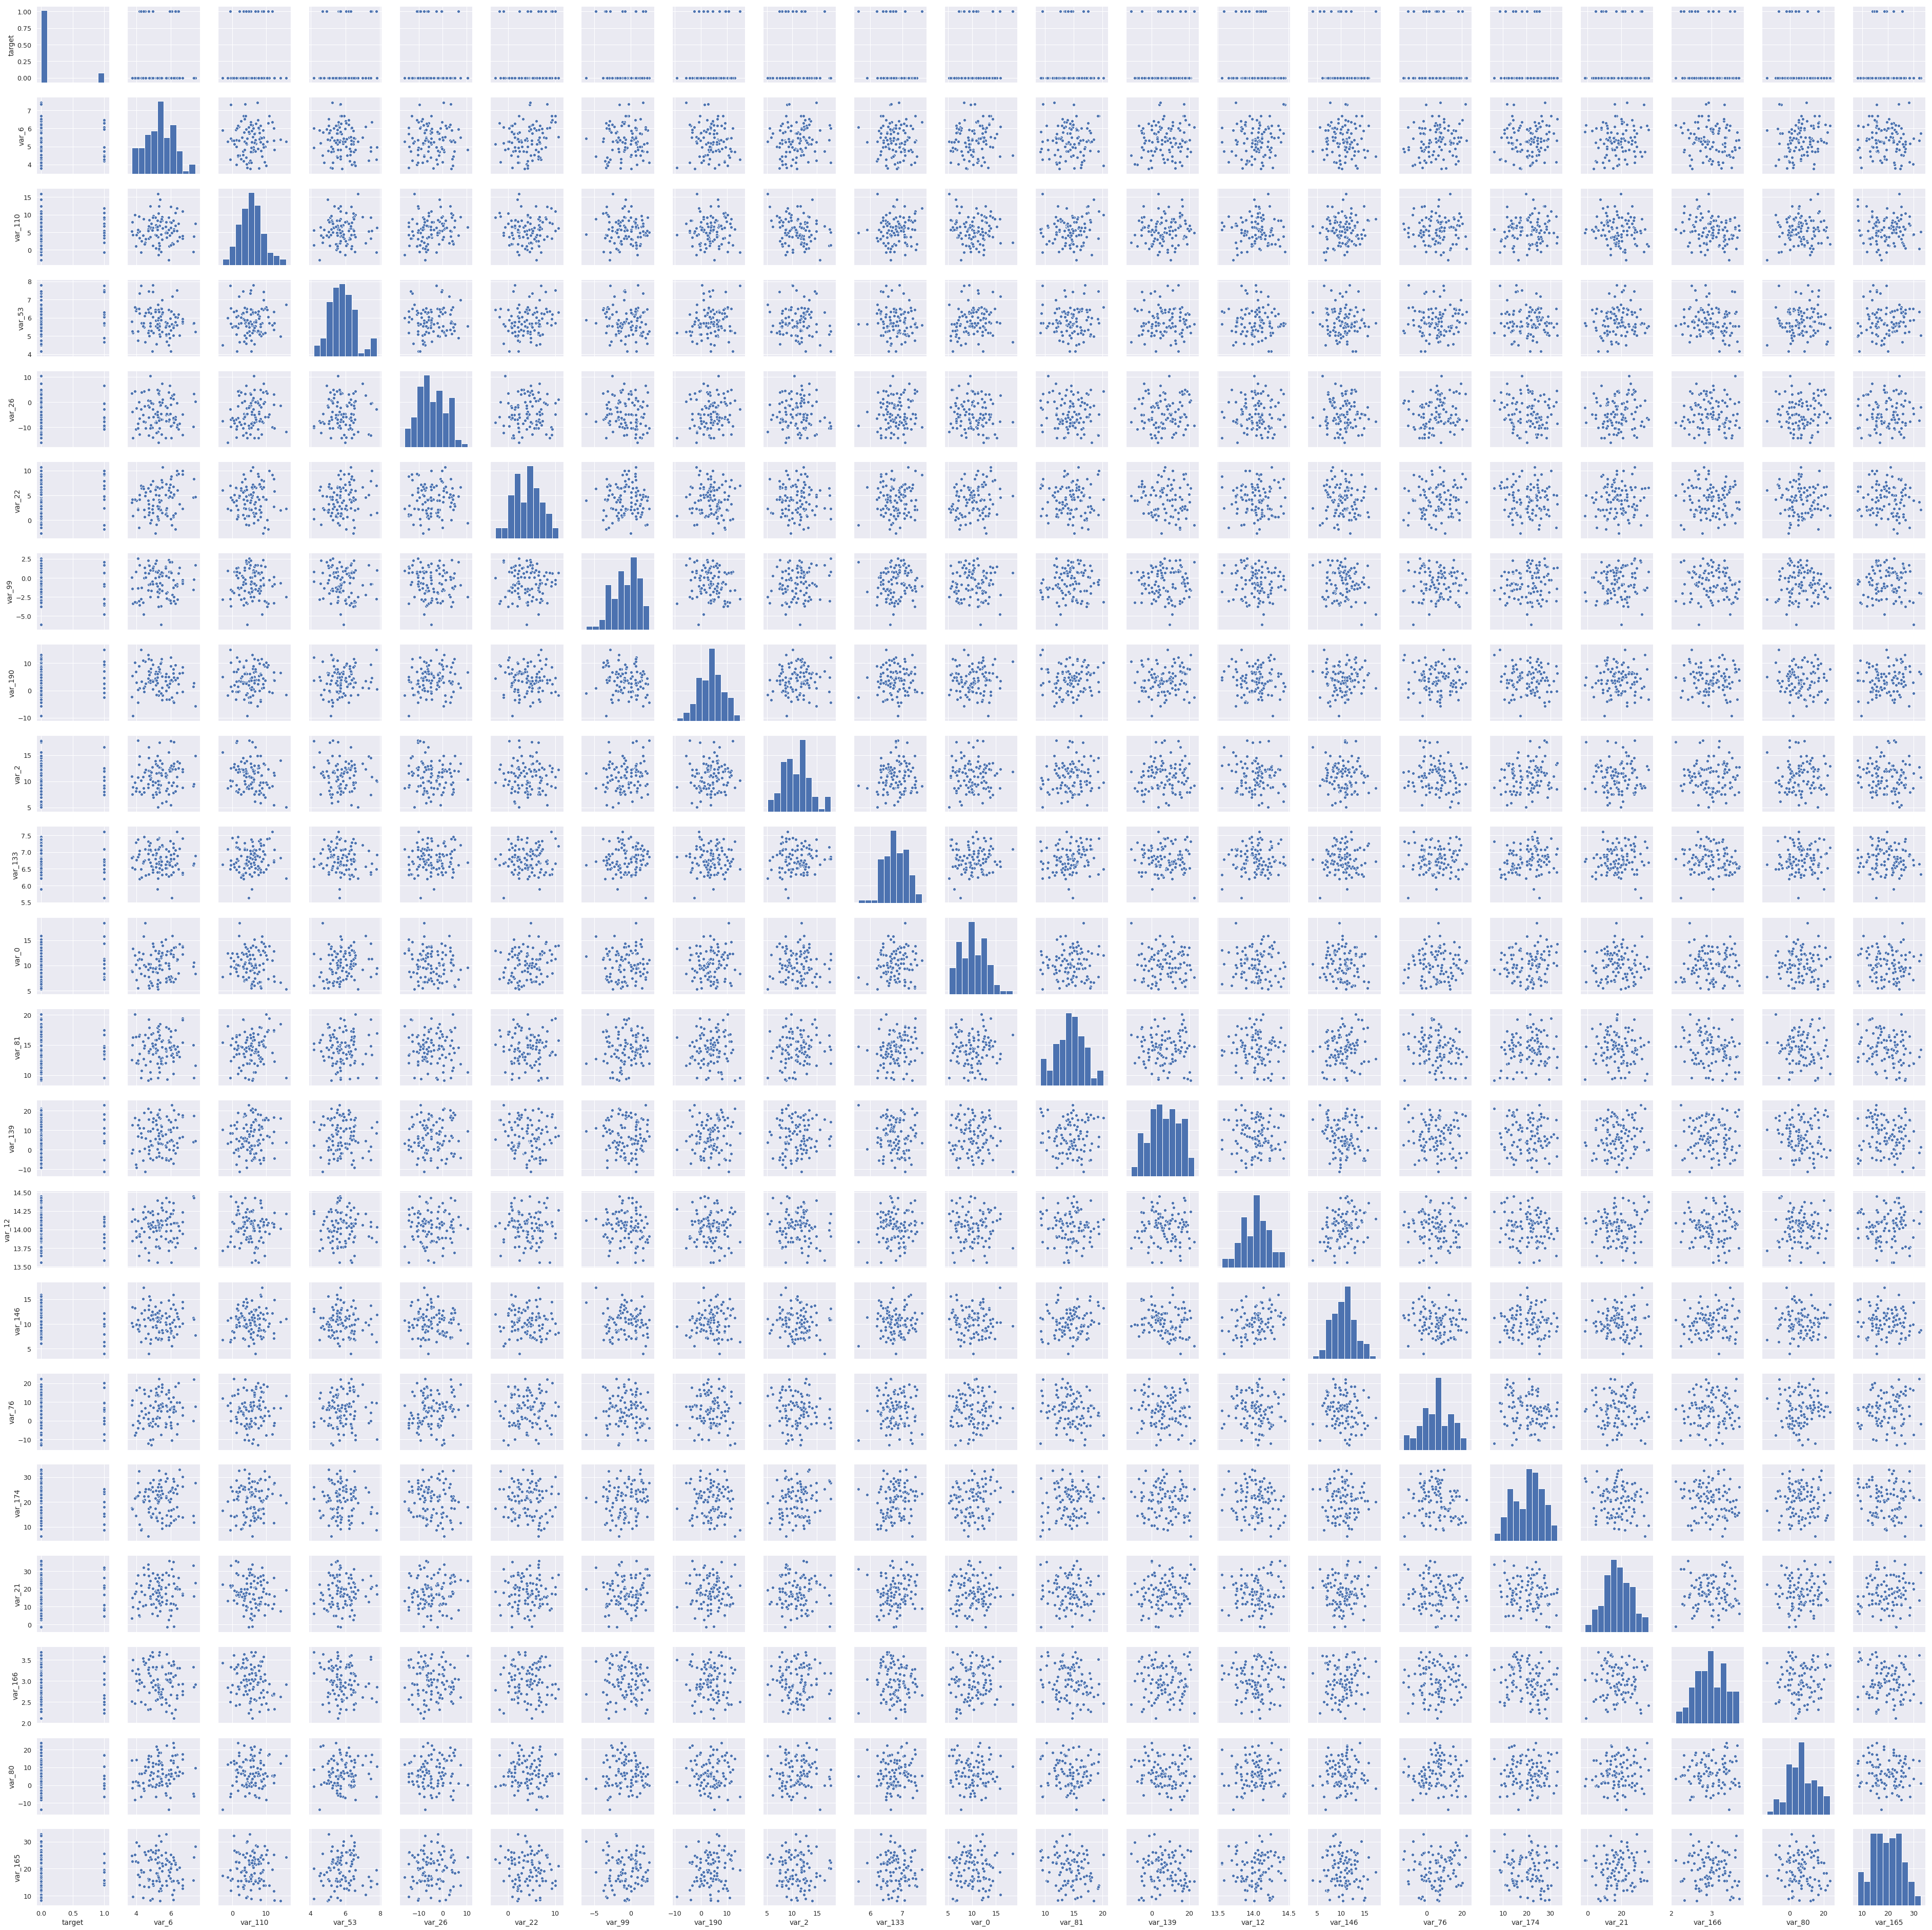

In [24]:
# Plotando o PAIPLOT para as variáveis mais correlacionadas com um sample (100 amostras)
sample = df_train[cols].sample(100)
sns.pairplot(sample)

Pelo resultado do pair-plot, não é possivel identificar nenhum agrupamento ou linearidade entre as variáveis.

Além disso, os histogramas da diagonal mostram novamente que as variáveis se aproximam de distribuições normais.

## Feature Selection

### Feature Importance - Variancethreshold

***"This method removes features with variation below a certain cutoff.
The idea is when a feature doesn’t vary much within itself, it generally has very little predictive power.***

***Variance Threshold doesn’t consider the relationship of features with the target variable.***

Ref.: https://towardsdatascience.com/why-how-and-when-to-apply-feature-selection-e9c69adfabf2

In [25]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(20.0)

In [26]:
# Realizando Feature Selection das variáveis de Treino
selected_trainX = selector.fit_transform(df_train.drop(['ID_code','target'], axis=1))
selected_trainX = pd.DataFrame(selected_trainX)
selected_trainX.rename(columns=('var_' + pd.Series(selector.get_support(indices=True)).astype(str)), inplace=True)
selected_trainX.describe()

,var_5,var_10,var_11,var_13,var_17,var_18,var_19,var_20,var_21,var_26,var_30,var_35,var_40,var_41,var_44,var_45,var_47,var_48,var_49,var_51,var_52,var_54,var_55,var_61,var_67,var_70,var_73,var_74,var_75,var_76,var_80,var_82,var_83,var_84,var_86,var_87,var_90,var_96,var_97,var_100,var_101,var_102,var_107,var_117,var_118,var_120,var_122,var_123,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_147,var_149,var_154,var_155,var_157,var_158,var_160,var_163,var_164,var_165,var_167,var_171,var_172,var_173,var_174,var_176,var_178,var_180,var_182,var_183,var_184,var_185,var_187,var_190,var_196,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,-5.065317,0.394340,-3.245596,8.530232,-5.696731,15.244013,12.438567,13.290894,17.257883,-4.055133,-7.687740,3.842499,-6.725505,9.299858,8.948289,-12.699667,-12.471737,14.704713,16.682499,13.428912,-2.528816,1.137117,12.745852,-11.946744,11.943223,24.446811,19.610888,19.518846,16.853732,6.050871,5.795044,-3.471273,1.025817,-2.590209,5.621058,11.351483,-16.548147,14.400433,18.539645,-6.600518,13.413526,22.294908,17.796266,16.102233,-5.305132,24.521078,1.192984,7.076254,-4.826053,-4.259472,22.968602,17.613651,1.210792,7.760193,3.423636,2.897596,11.983489,-3.300779,5.296237,6.974955,-2.074128,-4.813552,17.914591,24.259300,11.002170,-2.871906,19.315753,-4.151155,-0.831777,19.817094,-0.677967,20.210677,-2.799585,-1.014064,-2.741666,0.719109,8.769088,12.756676,-3.983261,-10.335043,3.234440,2.303335,-3.326537
std,7.863267,5.500793,5.970253,4.639536,6.712612,7.851370,7.996694,5.876254,8.196564,5.922210,7.965198,5.179559,8.279259,5.938088,5.903073,21.404912,10.579862,11.384332,7.855762,8.187306,4.985532,8.414241,5.690072,11.622948,7.365115,11.951742,7.466303,14.112591,6.055322,7.938351,7.436737,8.479255,8.297229,6.225305,7.751142,5.661867,13.152810,8.525400,12.642382,9.181683,4.950537,8.628179,7.604723,13.297662,8.799268,12.121016,5.168479,6.147345,6.166126,7.617732,10.382235,8.890516,4.551750,7.686433,4.896325,6.715637,5.691936,7.413301,10.385133,4.961678,5.771261,5.570272,7.885579,10.880263,5.262056,5.457784,5.024182,7.798020,5.378008,8.674171,5.966674,7.136427,7.513939,8.579810,5.261243,8.963434,4.474924,9.318280,4.725167,11.574708,4.559922,5.454369,10.438015
min,-32.562600,-20.731300,-26.095000,-6.011100,-33.380200,-10.664200,-12.402500,-5.432200,-10.089000,-24.243100,-34.798400,-16.513600,-35.211700,-8.535900,-9.939600,-90.252500,-47.686200,-23.902200,-8.070700,-15.046200,-24.721400,-26.778600,-3.782600,-48.802700,-19.544300,-17.027500,-1.665800,-34.101500,-1.293600,-21.633300,-18.042200,-30.026600,-24.220100,-24.439800,-19.272200,-8.481600,-61.718000,-12.158400,-21.740000,-39.179100,0.075700,-7.382900,-5.898000,-31.836900,-37.527700,-18.696200,-15.194000,-12.405900,-24.254600,-31.380800,-9.949300,-9.851000,-16.468400,-21.274300,-15.459500,-16.693700,-7.108000,-29.9840

In [27]:
# Realizando Feature Selection das variáveis de Teste
selected_testX = selector.fit_transform(df_test.drop(['ID_code'], axis=1))
selected_testX = pd.DataFrame(selected_testX)
selected_testX.rename(columns=('var_' + pd.Series(selector.get_support(indices=True)).astype(str)), inplace=True)
selected_testX.describe()

,var_5,var_10,var_11,var_13,var_17,var_18,var_19,var_20,var_21,var_26,var_30,var_35,var_40,var_41,var_44,var_45,var_47,var_48,var_49,var_51,var_52,var_54,var_55,var_61,var_67,var_70,var_73,var_74,var_75,var_76,var_80,var_82,var_83,var_84,var_86,var_87,var_90,var_96,var_97,var_100,var_101,var_102,var_107,var_113,var_117,var_118,var_120,var_122,var_123,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_147,var_149,var_154,var_155,var_157,var_158,var_160,var_163,var_164,var_165,var_167,var_171,var_172,var_173,var_174,var_176,var_178,var_180,var_182,var_184,var_185,var_187,var_190,var_196,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.00000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,-5.050558,0.371335,-3.268551,8.540872,-5.70445,15.265776,12.456675,13.298428,17.230598,-3.983721,-7.687695,3.870130,-6.736054,9.270646,8.952581,-12.666095,-12.455577,14.685615,16.687280,13.391711,-2.516943,1.133257,12.756876,-11.956023,11.881600,24.442541,19.613597,19.445254,16.876525,6.071365,5.815081,-3.426199,1.021512,-2.565281,5.637935,11.379621,-16.334976,14.425378,18.603350,-6.674013,13.389322,22.334372,17.824277,8.145250,16.039925,-5.310524,24.536099,1.191748,7.023936,-4.806086,-4.309017,23.019125,17.647446,1.243290,7.765888,3.411716,2.873279,11.971068,-3.238206,5.276210,6.971188,-2.043747,-4.836848,17.924734,24.146181,11.026376,-2.857328,19.320760,-4.189133,-0.805148,19.779528,-0.666240,20.264135,-2.776134,-0.949318,-2.722636,0.651432,12.719302,-3.963045,-10.291919,3.189766,2.290899,-3.246342
std,7.869293,5.508661,5.961443,4.628712,6.74646,7.846983,7.989812,5.884245,8.199877,5.945853,7.971581,5.170614,8.298827,5.944335,5.911181,21.402708,10.535003,11.382443,7.877107,8.192913,4.969897,8.418369,5.699920,11.632700,7.370539,11.933799,7.474120,14.078789,6.085044,7.966018,7.427520,8.426273,8.250587,6.228793,7.762716,5.641466,13.174833,8.552785,12.674441,9.181642,4.953360,8.630791,7.598867,4.472500,13.256813,8.767417,12.105735,5.145416,6.140683,6.170636,7.616104,10.373414,8.889635,4.564611,7.683951,4.907185,6.732620,5.685169,7.444975,10.374152,4.972334,5.775461,5.576516,7.867884,10.876184,5.268894,5.457937,5.039303,7.827428,5.378492,8.678024,5.987419,7.141816,7.557001,8.570314,5.225554,8.961936,9.316889,4.724641,11.562352,4.551239,5.446346,10.398589
min,-27.767000,-22.672400,-25.811800,-4.741300,-28.90690,-11.324200,-12.699400,-2.634600,-9.940600,-24.536100,-34.054800,-16.923800,-34.952400,-8.569600,-9.867700,-83.692100,-46.554200,-25.114800,-7.439000,-14.366900,-23.347300,-25.595500,-3.275100,-48.336900,-16.187300,-17.027500,-0.249000,-37.347000,-0.798800,-21.382400,-16.704500,-30.314600,-24.709100,-24.563900,-17.967600,-7.364900,-57.385300,-10.657900,-24.502700,-40.949000,-0.644800,-7.925600,-6.542200,-4.928300,-37.607300,-38.295700,-19.541500,-14.097200,-11.795700,-25.002000,-28.480000,-9.753500,-9.634100,-16.697400,-21.274300,-15.459500,-16.213500,-7.310600,-2

In [28]:
print(selected_trainX.shape, selected_testX.shape)

(200000, 83) (200000, 83)


### Padronizando os Dados

Transformando os dados através de uma operação de "scaling".

Desta forma será possível realizar a comparação entre os resultados, pois os cálculos de alguns modelos são baseados em distâncias e portanto os dados precisam estar padronizados.

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [30]:
# Padronizando os dados de Treino com Standard Scaler
scaled_trainX = scaler.fit_transform(selected_trainX)
scaled_trainX = pd.DataFrame(scaled_trainX)
scaled_trainX.columns = selected_trainX.columns
scaled_trainX.describe()

,var_5,var_10,var_11,var_13,var_17,var_18,var_19,var_20,var_21,var_26,var_30,var_35,var_40,var_41,var_44,var_45,var_47,var_48,var_49,var_51,var_52,var_54,var_55,var_61,var_67,var_70,var_73,var_74,var_75,var_76,var_80,var_82,var_83,var_84,var_86,var_87,var_90,var_96,var_97,var_100,var_101,var_102,var_107,var_117,var_118,var_120,var_122,var_123,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_147,var_149,var_154,var_155,var_157,var_158,var_160,var_163,var_164,var_165,var_167,var_171,var_172,var_173,var_174,var_176,var_178,var_180,var_182,var_183,var_184,var_185,var_187,var_190,var_196,var_199
count,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05
mean,1.478817e-17,3.346767e-17,-8.066103e-17,4.924128e-16,4.313147e-18,1.122255e-16,2.761995e-16,-1.398451e-16,-4.578304e-16,5.056344e-17,4.524126e-16,-7.598810e-17,2.886663e-17,-1.263689e-16,-2.984194e-16,-3.111400e-17,-3.483569e-16,3.190198e-17,2.141951e-16,-1.076372e-16,-6.143974e-17,2.244982e-17,-2.179756e-16,9.161782e-17,-1.320399e-16,-4.078915e-16,5.103992e-16,-6.918022e-17,-4.231115e-16,-3.855812e-17,-3.038672e-16,4.820810e-17,-2.595507e-17,4.579802e-17,-3.078648e-18,-3.611234e-16,1.549694e-16,-6.086243e-17,9.337864e-17,1.464256e-16,9.661634e-17,-2.093858e-16,1.037159e-16,-2.096279e-16,-1.752576e-16,-6.545309e-16,1.002809e-16,1.393097e-16,-1.655276e-16,1.160683e-17,-3.627360e-16,2.754831e-16,-5.629247e-17,3.171741e-17,5.917100e-17,-8.034684e-18,3.514112e-16,-9.434398e-18,-2.943534e-17,8.832015e-17,2.303047e-17,-2.144929e-16,-2.476219e-16,9.793777e-17,-2.492309e-16,3.793174e-17,-4.836356e-16,-5.095896e-17,4.931125e-18,3.683491e-16,2.711414e-17,4.070944e-16,1.379935e-16,-4.472367e-17,-6.073253e-17,-6.724621e-18,4.916412e-16,1.412520e-16,-1.195333e-16,5.624556e-17,-1.794120e-18,4.307943e-17,3.308326e-17
std,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00
min,-3.496937e+00,-3.840481e+00,-3.827218e+00,-3.134229e+00,-4.124108e+00,-3.29984

Nota:

Após a padronização, o desvio padrão (std) das variáveis deve ser igual a 1.0 e a média (mean) deve ser igual a 0.0, o que pode ser confirmado no comando describe acima.

In [31]:
# Padronizando os dados de Teste com Standard Scaler
scaled_testX = scaler.fit_transform(selected_testX)
scaled_testX = pd.DataFrame(scaled_testX)
scaled_testX.columns = selected_testX.columns
scaled_testX.describe()

,var_5,var_10,var_11,var_13,var_17,var_18,var_19,var_20,var_21,var_26,var_30,var_35,var_40,var_41,var_44,var_45,var_47,var_48,var_49,var_51,var_52,var_54,var_55,var_61,var_67,var_70,var_73,var_74,var_75,var_76,var_80,var_82,var_83,var_84,var_86,var_87,var_90,var_96,var_97,var_100,var_101,var_102,var_107,var_113,var_117,var_118,var_120,var_122,var_123,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_147,var_149,var_154,var_155,var_157,var_158,var_160,var_163,var_164,var_165,var_167,var_171,var_172,var_173,var_174,var_176,var_178,var_180,var_182,var_184,var_185,var_187,var_190,var_196,var_199
count,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05
mean,-1.209238e-16,8.832934e-18,4.158590e-17,-8.447576e-17,1.840328e-16,9.223400e-17,-4.550282e-16,3.806694e-16,-3.188474e-16,-3.517589e-17,-1.002270e-16,-6.006723e-17,-3.459005e-16,-8.548384e-17,2.061341e-17,-5.714790e-17,8.498091e-17,-6.802711e-17,-1.605271e-17,3.065281e-16,5.211109e-18,-3.335776e-17,-2.398534e-16,-6.094181e-17,-4.891421e-17,-3.342135e-16,-3.753553e-17,2.847947e-16,-1.965646e-16,1.959877e-17,-8.319290e-17,-7.923894e-17,-5.242973e-17,-3.022582e-18,1.142174e-16,2.706416e-16,2.173831e-16,-4.243716e-17,3.714851e-16,-2.163991e-16,-1.527031e-16,7.616313e-16,1.370570e-16,-2.208284e-16,-8.275103e-17,-5.671907e-17,3.094763e-16,-4.392819e-17,-2.813993e-16,1.036449e-17,-4.258482e-17,-4.379558e-16,8.109846e-17,6.076917e-17,-1.383083e-16,-1.167788e-17,1.989320e-16,3.344935e-16,-6.445844e-17,4.589662e-18,-3.318656e-16,-6.169953e-17,1.670070e-16,5.545897e-17,-7.869969e-17,2.154549e-16,-6.824430e-17,2.205250e-16,6.673051e-17,4.065553e-17,6.929934e-16,2.497863e-17,-6.686363e-16,-6.529721e-17,1.834172e-17,6.153238e-18,-2.579936e-17,1.567528e-16,1.194378e-16,1.692424e-17,1.478950e-16,6.846301e-17,-5.582479e-18
std,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00
min,-2.886727e+00,-4.183193e+00,-3.781518e+00,-2.869525e+00,-3.439212e+00,-3.38

Nota:

Após a padronização, o desvio padrão (std) das variáveis deve ser igual a 1.0 e a média (mean) deve ser igual a 0.0, o que pode ser confirmado no comando describe acima.

In [32]:
print(scaled_trainX.shape, scaled_testX.shape)

(200000, 83) (200000, 83)


In [33]:
scaled_train = pd.concat([df_train.target, scaled_trainX], axis=1)
scaled_trainY = scaled_train.target
scaled_trainY.value_counts()

0    179902
1     20098
Name: target, dtype: int64

Nota:
    
O dataset de Test não inclui a variável target, pois é ela que queremos prever.

Sendo assim, vamos considerar que scaled_test = scaled_testX

### Balaceamento do Dataset de Treino

De acordo com os resultados, a quantidade de dados obtidos para a variável target mostra um dataset não balanceado.

Para corrigir este desbalanceamento, utilizada a técnica de oversampling.

Ref.: https://towardsdatascience.com/having-an-imbalanced-dataset-here-is-how-you-can-solve-it-1640568947eb

In [34]:
from imblearn.over_sampling import SMOTE

# Resample the minority class.
smt = SMOTE(sampling_strategy='minority', random_state=42)

# Fit the model to generate the data.
%time oversampled_trainX, oversampled_trainY = smt.fit_sample(scaled_trainX, scaled_trainY)

Using TensorFlow backend.


CPU times: user 2min 14s, sys: 736 ms, total: 2min 15s
Wall time: 2min 15s


In [35]:
oversampled_trainX = pd.DataFrame(oversampled_trainX, columns=scaled_trainX.columns.values)
oversampled_trainY = pd.DataFrame(oversampled_trainY, columns=pd.DataFrame(scaled_trainY).columns.values)
oversampled_train = pd.concat([oversampled_trainY, oversampled_trainX], axis=1)
oversampled_train.head()

,target,var_5,var_10,var_11,var_13,var_17,var_18,var_19,var_20,var_21,var_26,var_30,var_35,var_40,var_41,var_44,var_45,var_47,var_48,var_49,var_51,var_52,var_54,var_55,var_61,var_67,var_70,var_73,var_74,var_75,var_76,var_80,var_82,var_83,var_84,var_86,var_87,var_90,var_96,var_97,var_100,var_101,var_102,var_107,var_117,var_118,var_120,var_122,var_123,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_147,var_149,var_154,var_155,var_157,var_158,var_160,var_163,var_164,var_165,var_167,var_171,var_172,var_173,var_174,var_176,var_178,var_180,var_182,var_183,var_184,var_185,var_187,var_190,var_196,var_199
0,0,-0.536430,0.460091,1.076623,-1.714773,-0.229802,-1.395940,2.285292,-0.468989,-0.126734,-0.184673,0.926437,1.300500,0.179582,-0.324223,0.456291,0.265485,-0.164640,0.116264,-1.445719,1.907481,0.368029,-0.223968,0.366666,1.454518,1.424133,-0.235063,-1.439925,1.671834,0.252319,-1.057511,1.055809,0.570662,0.230979,-0.310201,0.477536,0.902216,-0.372640,-0.637653,-0.180540,1.750971,-0.020872,0.491726,-0.084272,-0.039634,-0.922462,-0.702227,-0.058680,-1.024974,1.621549,0.970629,0.624732,1.551190,0.355273,1.027749,1.002196,-1.265512,1.243501,-1.776800,1.215988,0.707191,0.646555,-1.493440,-0.039210,-0.808962,-1.133356,1.749415,-1.323871,0.442890,-1.411980,0.122226,0.642079,-0.231051,-0.974846,-0.291946,-1.076447,0.261797,1.251424,1.404031,2.086632,-0.810464,0.263374,1.022131,0.214135
1,0,1.539900,-0.144987,1.893408,-0.025160,-1.473077,-0.948119,2.017368,-1.678317,-1.771135,-1.302434,-0.202250,-0.599010,-0.530145,-1.250719,-1.305067,-1.620194,1.197234,1.730162,1.148358,-0.024833,-0.316814,-1.097157,1.028750,0.404807,-0.544300,1.348459,0.066420,-0.831511,-1.618553,-0.350196,-0.436865,0.452821,-0.704673,-0.465005,-2.478500,-0.044541,1.294399,1.218382,0.644536,-0.772680,-1.011353,1.527382,1.879433,-0.620414,-0.705159,0.583189,1.369965,0.502177,1.100021,-0.621266,-1.270337,0.061194,-0.699269,1.093098,0.055157,0.563269,-2.162326,2.032943,-0.935815,-1.520388,0.392277,-0.876395,0.568166,0.480256,0.918394,-0.392137,-0.832228,1.727411,1.102749,0.255461,1.037661,1.408807,-0.590320,-0.738204,-0.542085,-1.743656,0.146464,1.050349,-0.186013,-0.483543,0.966611,1.067654,0.505685
2,0,-0.511033,-0.130752,-1.343197,-0.262491,0.589523,-1.342815,1.005285,0.759841,0.107340,-0.665103,-0.428711,0.051395,-0.820353,-1.188257,-0.821217,0.223868,0.631894,0.530817,-1.246871,0.751982,0.653014,0.971603,-1.135534,0.135366,-0.283326,-1.847904,-0.996344,0.015047,0.428181,-0.194760,0.225618,1.984162,1.103911,1.293210,-1.300297,-0.319716,-0.445203,0.704094,-0.118937,0.675980,-0.157928,-0.858655,-1.205697,0.952122,-1.360192,-0.277187,0.306438,-1.504857,1.420969,-0.979602,0.151711,-0.228441,0.573497,0.118027,0.808724,-0.795369,-0.310561,0.682987,-0.632091,-2.448705,0.459507,0.547758,2.024892,-1.015814,-1.004946,0.335468,0.237541,-0.185182,-0.572671,-1.448003,-0.862364,0.766677,0.331276,-1.012477,-0.294957,-1.560110,-1.254681,1.108568,-0.278666,0.351547,-0.072093,-1.617906,0.356681
3,0,0.410672,0.347543,1.014331,0.741492,0.784619,0.088977,0.160959,1.192958,-0.573410,0.822099,-0.948135,-1.884007,0.349803,-1.740777,-0.152428,-0.559888,-2.145039,-1.224793,-1.056386,-0.473736,0.866172,0.826480,-0.061274,-1.124972,1.584647,-1.706920,0.643936,-1.062164,-0.236195,0.710052,-0.673838,0.600582,-0.761150,0.673528,-1.024169,0.755639,0.681343,-0.356680,-0.030931,-1.444040,1.841840,-0.426743,-1.408190,1.654375,1.008988,0.498583,0.535713,-2.492571,0.588321,0.816265,0.442324,0.786554,-0.886275,0.158970,0.094696,1.945644,-0.345980,1.006704,-0.281763,2.027272,-1.535695,0.645940,0.261289,0.700720,-1.351618,-1.505430,-0.411123,0.185862,-0.996695,-0.182207,2.076768,-0.765424,1.953266,-1.102129,-0.192528,0.131590,-0.337210,-1.418782,0.832451,-0.215372,0.270216,-0.959020,-0.543502
4,0,0.955574,-1.788863,-1.490109,-0.138103,0.391612,-1.110346,-0.140479,1.384169,0.207760,1.220617,0.568668,-0.619668,0.136390,0.803062,-0.345514,-2.466105,1.183018,-1.303489,-0.287140,-0.359486,0

In [36]:
oversampled_train.target.value_counts()

1    179902
0    179902
Name: target, dtype: int64

O resultado acima mostra que o DataFrame agora está balanceado e podemos prosseguir na análise.

### Plotando um HeatMap após o Balaceamento

In [37]:
# Verificando as correlações no Dataset de Treino após o Balanceamento
oversampled_train_corr = oversampled_train.corr()
oversampled_train_corr

,target,var_5,var_10,var_11,var_13,var_17,var_18,var_19,var_20,var_21,var_26,var_30,var_35,var_40,var_41,var_44,var_45,var_47,var_48,var_49,var_51,var_52,var_54,var_55,var_61,var_67,var_70,var_73,var_74,var_75,var_76,var_80,var_82,var_83,var_84,var_86,var_87,var_90,var_96,var_97,var_100,var_101,var_102,var_107,var_117,var_118,var_120,var_122,var_123,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_147,var_149,var_154,var_155,var_157,var_158,var_160,var_163,var_164,var_165,var_167,var_171,var_172,var_173,var_174,var_176,var_178,var_180,var_182,var_183,var_184,var_185,var_187,var_190,var_196,var_199
target,1.000000,0.051795,-0.003782,0.039825,-0.092649,0.004992,0.074211,0.017206,-0.030069,-0.102639,0.101830,0.004600,0.055581,0.081583,-0.005540,-0.080105,-0.038618,0.019269,0.057701,0.049329,0.040930,0.046075,-0.028517,0.025289,0.015652,0.074341,0.048102,-0.017034,0.037659,-0.068077,-0.104513,-0.089803,0.048312,-0.037487,0.025686,-0.068087,-0.070622,0.055415,0.005983,0.023062,0.000516,-0.018880,-0.034151,-0.069173,0.004428,0.074956,-0.025857,-0.074663,-0.073746,0.027238,0.047089,-0.005527,0.043235,0.037269,-0.129649,0.029361,-0.048439,-0.036949,0.073445,-0.083167,-0.074827,0.065436,0.055797,-0.008643,-0.011817,0.052140,0.073236,-0.096886,0.058300,0.026063,-0.068159,0.081474,-0.102244,0.016109,-0.038053,0.052259,-0.010069,-0.013632,0.082652,0.002284,0.027046,0.092917,0.040135,0.052678
var_5,0.051795,1.000000,0.003467,0.000237,-0.004275,0.000267,0.000812,0.008391,-0.003792,-0.006415,0.005461,0.000410,0.003210,-0.000038,0.010245,-0.002614,-0.003161,0.005046,0.006961,-0.000758,-0.003927,0.007732,0.000009,-0.000919,0.001999,0.006720,0.004597,-0.000151,0.013667,-0.000996,-0.008227,-0.003661,0.007269,-0.012439,0.002739,0.001833,0.004422,0.002042,-0.001011,-0.002391,-0.001801,-0.002132,0.000034,-0.006472,-0.006750,0.005843,-0.008298,0.004705,-0.005298,-0.002141,0.006694,0.001444,0.005274,-0.003343,0.001069,-0.010639,0.005770,-0.001671,0.004943,-0.005702,-0.003118,-0.000055,-0.000460,-0.000795,-0.010994,-0.009804,0.004249,-0.000432,0.001972,-0.002409,-0.002391,0.007880,-0.008172,-0.004138,-0.002519,0.001032,-0.002290,0.000064,0.005765,-0.006139,0.000186,0.000855,0.008696,-0.000603
var_10,-0.003782,0.003467,1.000000,0.001285,0.006144,0.007062,0.005100,-0.006091,-0.001530,-0.000182,0.006294,0.000582,-0.003728,0.000762,-0.003057,0.006479,-0.003820,0.003208,-0.002818,0.000685,0.005107,0.000499,0.000713,-0.001272,-0.001332,0.001422,-0.000440,0.004947,-0.000229,0.003301,0.000492,-0.010107,0.003531,0.004595,0.003258,-0.000806,0.005956,-0.000575,0.002022,0.003765,-0.000014,0.003027,0.005753,-0.007256,-0.000500,0.005849,0.001500,-0.001975,0.000917,-0.004756,0.006015,-0.004142,-0.004968,-0.008673,-0.012278,-0.000866,0.006335,-0.001063,-0.002027,0.012393,-0.004413,0.001814,0.001984,0.002976,-0.002913,-0.011909,0.003999,-0.000113,-0.003953,0.004975,0.000315,-0.005374,-0.005468,0.001898,-0.004794,-0.001211,-0.002153,0.004452,0.001076,-0.000766,0.005230,0.005183,-0.007097,-0.009169
var_11,0.039825,0.000237,0.001285,1.000000,-0.001097,0.006115,0.008576,0.001972,-0.010180,-0.010533,0.005075,-0.003329,0.006714,0.011100,0.006875,0.003532,-0.001739,-0.004670,0.002585,0.004698,0.004952,0.001902,-0.002919,0.002166,-0.001223,-0.004207,0.001025,-0.004944,0.004030,-0.004317,-0.005331,0.005486,0.005461,-0.000875,0.001561,-0.008282,-0.004155,-0.009186,-0.001568,0.009582,-0.007534,0.004944,-0.000114,0.000716,-0.002025,-0.001258,-0.007636,-0.004257,0.003713,-0.001820,-0.005348,0.005373,0.005686,0.002474,-0.007857,0.005997,0.000503,0.008165,0.006551,0.001433,0.003088,0.001574,0.008285,0.000105,-0.004081,0.004043,-0.005725,-0.005518,0.001792,-0.004210,-0.002124,-0.003837,-0.006169,-0.007069,-0.007633,-0.000592,-0.001870,0.000725,0.005836,-0.003095,0.000500,0.005704,0.001198,-0.000383
var_13,-0.092649,-0.004275,0.006144,-0.001097,1.000000,-0.004187,-0.001104,-0.007358,-0.008796,0.008995,-0.014581,-0.000198,0.002203,-0.004405,0.002468,0.011253,

In [38]:
# Identificando as 10 variáveis que mais estão positivamente correlacionadas com o target
oversampled_train_most_pos_corr = oversampled_train_corr.nlargest(11, 'target')['target']
# Identificando as 10 variáveis que mais estão negativamente correlacionadas com o target
oversampled_train_most_neg_corr = oversampled_train_corr.nsmallest(10, 'target')['target']
# Concatenando as 20 variáveis
oversampled_train_most_corr = pd.concat([oversampled_train_most_pos_corr,oversampled_train_most_neg_corr])
oversampled_train_most_corr

target     1.000000
var_26     0.101830
var_190    0.092917
var_184    0.082652
var_40     0.081583
var_173    0.081474
var_118    0.074956
var_67     0.074341
var_18     0.074211
var_147    0.073445
var_164    0.073236
var_139   -0.129649
var_76    -0.104513
var_21    -0.102639
var_174   -0.102244
var_165   -0.096886
var_13    -0.092649
var_80    -0.089803
var_149   -0.083167
var_44    -0.080105
var_154   -0.074827
Name: target, dtype: float64

Nota: o resultado acima mostra que houve uma pequena melhora nas correlações após realizar o balanceamento.

### Feature Engineering (F.E)

In [39]:
# for x in oversampled_train.var_0.unique():
#     temp = oversampled_train[oversampled_train.var_0==x]
# #    print(x,temp['price'].mean())

# # Criação de um DataFrame para o tamanho médio das casas para cada ZIP CODE
# # Aproveitando o tamanho médio das casas com mesmo ZIP CODE
# df_zip = df.groupby(['zip']).agg({'size_house':'mean'})
# df_zip.shape

# # Fazendo uma merge dos dois DataFrames para capturar o tamanho médio das casas por ZIP CODE em pandas
# df = pd.merge(df, df_zip, how='inner', left_on='zip', right_index=True)

# data['Destination'].unique()
# data['Destination'] = np.where(data['Destination']=='Delhi','New Delhi', data['Destination'])

# df_train['var_0'].unique()
# df_train['var_0_c'] = np.where(df_train['var_0']=='Delhi','New Delhi', data['Destination'])

# df_train['var_0_c'] = [df_train['var_0'].value_counts().head(20)

# pd.Series(df_train['var_0'].unique()).value_counts()

## Rodando os modelos de Machine Learning

Rodando uma primeira regressão do tipo Logística como Benchmark

In [40]:
# Definindo as variáveis explicativas e a variável target para o dataframe original
X = df_train.drop(['ID_code','target'], axis=1)
y = df_train.target
print(X.shape, y.shape)

(200000, 200) (200000,)


In [41]:
# Rodando uma regressão logística com statsmodel para os dados originais para efeito de comparação
lr = sm.Logit(y, X)        # instanciando o modelo
result = lr.fit()          # ajustando o modelo
print(result.summary2())   # imprimindo o resumo dos resultados

Optimization terminated successfully.
         Current function value: 0.231171
         Iterations 8
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.291     
Dependent Variable: target           AIC:              92868.5512
Date:               2019-10-04 13:33 BIC:              94909.7657
No. Observations:   200000           Log-Likelihood:   -46234.   
Df Model:           199              LL-Null:          -65232.   
Df Residuals:       199800           LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     8.0000                                       
------------------------------------------------------------------
              Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
var_0         0.0551    0.0028   19.6991  0.0000   0.0496   0.0606
var_1         0.0406    0.0021   19.0685  0.0000   0.0364   0.

In [42]:
# Definindo as variáveis explicativas e a variável target para o dataframe balanceado e reduzido via feature selection
X = oversampled_trainX
y = oversampled_trainY
print(X.shape, y.shape)

(359804, 83) (359804, 1)


In [43]:
# Rodando a regressão logística via statsmodel
lr = sm.Logit(y, X)        # instanciando o modelo
result = lr.fit()          # ajustando o modelo
print(result.summary2())   # imprimindo o resumo dos resultados

Optimization terminated successfully.
         Current function value: 0.590921
         Iterations 5
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.147      
Dependent Variable: target           AIC:              425397.2892
Date:               2019-10-04 13:33 BIC:              426293.1343
No. Observations:   359804           Log-Likelihood:   -2.1262e+05
Df Model:           82               LL-Null:          -2.4940e+05
Df Residuals:       359721           LLR p-value:      0.0000     
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     5.0000                                        
--------------------------------------------------------------------
           Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
var_5      0.0988     0.0039    25.2764   0.0000    0.0911    0.1065
var_10    -0.0122     0.0040    -3.0964   0.0

**Conclusão:** o resultado para os dados balanceados e reduzidos via feature selection produziu um R quadrado mais baixo, porém pode ajudar a não overfitar o modelo.

 ### Separando os dados do Dataset de Treino via "train_test_split"

In [44]:
# Separando em dados de treino e teste - 80/20
X_train, X_test, y_train, y_test = train_test_split(oversampled_trainX, oversampled_trainY, test_size=0.2, random_state=42, stratify=oversampled_trainY)
y_train = pd.Series.ravel(y_train)

In [45]:
# Rodando uma regressão logística com o pacote sklearn
lr = LogisticRegression(solver='liblinear')   # instanciando o modelo
%time lr.fit(X_train, y_train)                # ajustando o modelo
y_pred = lr.predict(X_test)                   # calculando os preditos
lr.score(X_test, y_test)                      # obtendo o score do modelo

CPU times: user 3.69 s, sys: 272 ms, total: 3.96 s
Wall time: 3.93 s


0.6981420491655203

In [46]:
# Calculando a Matriz de Confusão
confusion_matrix(y_test, y_pred)

array([[24982, 10999],
       [10723, 25257]])

In [47]:
# Imprimindo as métricas 
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

Accuracy: 0.6981420491655203
Precision: 0.6966295233892321
Recall: 0.7019733185102834


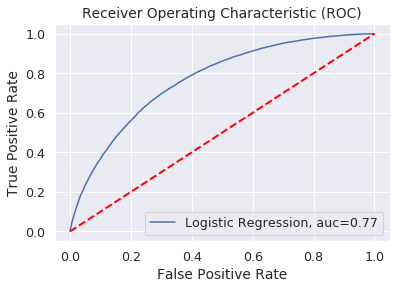

In [48]:
# Plotando a curva ROC
y_pred_proba = lr.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr,label="Logistic Regression, auc=%0.2f" % auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc=4)
plt.show()

Como um primeiro resultado, o valor da área AUC da curva ROC foi de 0.77.

**Fazendo predições com outros modelos**

Rodando outros modelos e medindo seus resultados, incluindo a curva ROC, a qual poderá nos ajudar a escolher qual o melhor modelo para a predição.

GaussianNB
****Results****
Accuracy: 0.8118564222287072
Precision: 0.8291530992402241
Recall: 0.7855753196220122
****Elapsed time to run: 1.3245823383331299 ****
DecisionTreeClassifier
****Results****
Accuracy: 0.7636358583121413
Precision: 0.7414043213803986
Recall: 0.8096720400222346
****Elapsed time to run: 115.46453166007996 ****
RandomForestClassifier
****Results****
Accuracy: 0.8818387737802421
Precision: 0.909847558247069
Recall: 0.8476653696498054
****Elapsed time to run: 79.40422368049622 ****


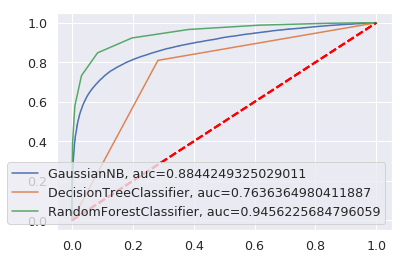

In [49]:
import time

# Definindo uma lista com todos os modelos
classifiers = [
    GaussianNB(),
    DecisionTreeClassifier(),
    RandomForestClassifier()]

# Rotina para instanciar, predizer e medir os resultados de todos os modelos
for clf in classifiers:
    start = time.time()
    # instanciando o modelo
    clf.fit(X_train, y_train)
    # armazenando o nome do modelo na variável name
    name = clf.__class__.__name__
    # imprimindo o nome do modelo
    print("="*30)
    print(name)
    # imprimindo os resultados do modelo
    print('****Results****')
    y_pred = clf.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    
    # Plotando a curva ROC
    y_pred_proba = clf.predict_proba(X_test)[::,1]
    fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr,tpr,label=name+", auc="+str(auc))
    plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
    plt.legend(loc=4)
    
    end = time.time()
    print('****Elapsed time to run:', end - start,'****')

Observações:

O algoritmo **Gaussian Naive Bayes** teve um bom resultado, pois suas premissas foram satisfeitas:

- O requisito dos preditores é serem independentes. Vimos que as features possuem fraca correlação entre si no pair plot analisado com as 10 mais e 10 menos correlacionadas à variável target.
- Quando os preditores assumem um valor contínuo e não são discretos, assumimos que esses valores são amostrados a partir de uma distribuição gaussiana.

Nota: **Bernoulli Naive Bayes** não faz sentido nesse caso, pois os preditores não são variáveis booleanas.

Os classificadores **Decision Tree** e **Random Forest** precisariam ter os parâmetros otimizados, pois pode ser que estejam se ajustando demais ao modelo não sendo assim generalistas.

**Conclusão:**

Considerando que a avaliação para este desafio do Santander se baseia na AUC, os melhores resultados obtidos foram com os modelos:

- **Gaussian Naive Bayes**
- **Random Forest Classifier**

"Submissions are evaluated on area under the ROC curve between the predicted probability and the observed target."

Ref.: https://www.kaggle.com/c/santander-customer-transaction-prediction/overview/evaluation

## Avaliação do Modelo

### Realizando Cross-validation

Utilizando cross_val_score para validação e fine tune do modelo RandomForest.

**cross_val_score** -> uses stratifield kfold by default

In [50]:
# %time scores_GNB = cross_val_score(GaussianNB(), X_train, y_train, cv=5)
# scores_GNB

In [51]:
# %time scores_LR = cross_val_score(LogisticRegression(solver='liblinear'), X_train, y_train, cv=3)
# scores_LR

In [52]:
# %time scores_DT = cross_val_score(DecisionTreeClassifier(max_depth=10), X_train, y_train, cv=3)
# scores_DT

In [53]:
# %time scores_DT = cross_val_score(DecisionTreeClassifier(max_depth=20), X_train, y_train, cv=3)
# scores_DT

In [54]:
# %time scores_DT = cross_val_score(DecisionTreeClassifier(max_depth=40), X_train, y_train, cv=3)
# scores_DT

In [55]:
# %time scores_RF = cross_val_score(RandomForestClassifier(n_estimators=10), X_train, y_train, cv=3)
# scores_RF

In [56]:
# %time scores_RF = cross_val_score(RandomForestClassifier(n_estimators=20), X_train, y_train, cv=3)
# scores_RF

In [57]:
# %time scores_RF = cross_val_score(RandomForestClassifier(n_estimators=40), X_train, y_train, cv=3)
# scores_RF

- Não houve variação dos valores aumentando o folder (cv), o que é um bom resultado
- DecisionTreeClassifier -> produz melhor resultado aumentando a profundidade
- Random Forest classifier -> produz melhor resultado aumentando a quantidade de trees

### Rodando os modelos para o dataset de Test

In [58]:
# Separando em dados de treino e teste - 80/20
X_train, X_test, y_train, y_test = train_test_split(oversampled_trainX, oversampled_trainY, test_size=0.2, random_state=42, stratify=oversampled_trainY)
y_train = pd.Series.ravel(y_train)

Rodando a Regressão Logística

In [59]:
# instanciando o modelo
lr = LogisticRegression(solver='liblinear')
# ajustando o modelo
%time lr.fit(X_train, y_train)
# calculando os preditos para os dados de teste
y_pred_lr = lr.predict(scaled_testX)

CPU times: user 3.27 s, sys: 120 ms, total: 3.39 s
Wall time: 3.36 s


 Rodando o algoritmo de Gaussian Naive Bayes

In [60]:
# instanciando o modelo
gnb = GaussianNB()
# ajustando o modelo com os dados de treino
%time gnb.fit(X_train, y_train)
# calculando os preditos para os dados de teste
y_pred_gnb = gnb.predict(scaled_testX)

CPU times: user 448 ms, sys: 276 ms, total: 724 ms
Wall time: 690 ms


Rodando o classificador Decision Tree

In [61]:
# instanciando o modelo
clf_tree = DecisionTreeClassifier()
# ajustando o modelo com os dados de treino
%time clf_tree.fit(X_train, y_train)
# calculando os preditos para os dados de teste
y_pred_tree = clf_tree.predict(scaled_testX)

CPU times: user 1min 51s, sys: 72 ms, total: 1min 51s
Wall time: 1min 51s


Rodando o classificador Random Forest

In [62]:
# instanciando o modelo
clf_rf = RandomForestClassifier(n_estimators=40)
# ajustando o modelo com os dados de treino
%time clf_rf.fit(X_train, y_train)
# calculando os preditos para os dados de teste
y_pred_rf = clf_rf.predict(scaled_testX)

CPU times: user 5min 6s, sys: 160 ms, total: 5min 6s
Wall time: 5min 5s


### Criando um arquivo de submissão no KAGGLE

In [63]:
submission = pd.read_csv('../input/santander-customer-transaction-prediction/sample_submission.csv')
submission['target'] = y_pred_lr[0:200000]
submission.to_csv('submission_lr.csv', index=False)

In [64]:
submission = pd.read_csv('../input/santander-customer-transaction-prediction/sample_submission.csv')
submission['target'] = y_pred_gnb[0:200000]
submission.to_csv('submission_gnb.csv', index=False)

In [65]:
submission = pd.read_csv('../input/santander-customer-transaction-prediction/sample_submission.csv')
submission['target'] = y_pred_tree[0:200000]
submission.to_csv('submission_tree.csv', index=False)

In [66]:
submission = pd.read_csv('../input/santander-customer-transaction-prediction/sample_submission.csv')
submission['target'] = y_pred_rf[0:200000]
submission.to_csv('submission_rf.csv', index=False)

### Resultados do Kaggle